In [1]:


import rubin_sim.maf.metricBundles as metricBundles
import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.db as db
import rubin_sim.maf.utils as utils
import rubin_sim.maf.metrics as metrics
import sqlite3
import numpy as np
from rubin_sim.maf.metrics.snNSNMetric import SNNSNMetric
import healpy as hp
%matplotlib inline
import glob
import matplotlib.pylab as plt
from rubin_sim.utils import calcSeason
from rubin_sim.maf.metrics import findSeasonEdges


In [2]:
class SeasonLengthMetric(metrics.BaseMetric):
    """
    Calculate the length of LSST seasons, in days.

    Parameters
    ----------
    minExpTime: float, opt
        Minimum visit exposure time to count for a 'visit', in seconds. Default 20.
    reduceFunc : function, optional
       Function that can operate on array-like structures. Typically numpy function.
       This reduces the season length in each season from 10 separate values to a single value.
       Default np.median.
    """
    def __init__(self, mjdCol='observationStartMJD', expTimeCol='visitExposureTime', minExpTime=20,
                 reduceFunc=np.median, metricName='SeasonLength', exclude_ends=True, **kwargs):
        units = 'days'
        self.exclude_ends = exclude_ends
        self.mjdCol = mjdCol
        self.expTimeCol = expTimeCol
        self.minExpTime = minExpTime
        self.reduceFunc = reduceFunc
        super().__init__(col=[self.mjdCol, self.expTimeCol],
                         units=units, metricName=metricName, **kwargs)

    def run(self, dataSlice, slicePoint):
        """Calculate the (reduceFunc) of the length of each season.
        Uses the slicePoint RA/Dec to calculate the position in question, then uses the times of the visits
        to assign them into seasons (based on where the sun is relative to the slicePoint RA).

        Parameters
        ----------
        dataSlice : numpy.array
            Numpy structured array containing the data related to the visits provided by the slicer.
        slicePoint : dict
            Dictionary containing information about the slicepoint currently active in the slicer.

        Returns
        -------
        float
           The (reduceFunc) of the length of each season, in days.
        """
        # Order data Slice/times and exclude visits which are too short.
        long = np.where(dataSlice[self.expTimeCol] > self.minExpTime)
        if len(long[0]) == 0:
            return self.badval
        data = np.sort(dataSlice[long], order=self.mjdCol)
        # SlicePoints ra/dec are always in radians - convert to degrees to calculate season
        seasons = calcSeason(np.degrees(slicePoint['ra']), data[self.mjdCol])
        firstOfSeason, lastOfSeason = findSeasonEdges(seasons)
        seasonlengths = data[self.mjdCol][lastOfSeason] - data[self.mjdCol][firstOfSeason]
        if self.exclude_ends:
            seasonlengths = seasonlengths[1:-1]
        if np.size(seasonlengths) > 0:
            result = self.reduceFunc(seasonlengths)
        else:
            result = self.badval
        return result


In [3]:
files = ['baseline_nexp2_v1.7.1_10yrs.db', 'full_disk_v1.7_10yrs.db', 'footprint_6_v1.7.1_10yrs.db']

In [4]:
outDir='seasons'
resultsDb = db.ResultsDb(outDir=outDir)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with no constraint for columns ['visitExposureTime', 'fieldDec', 'fieldRA', 'observationStartMJD'].
Found 2044984 visits
Running:  ['baseline_nexp2_v1_7_1_Median_Season_Length_HEAL', 'baseline_nexp2_v1_7_1_Min_Season_Length_HEAL', 'baseline_nexp2_v1_7_1_Max_Season_Length_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Use

Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with no constraint for columns ['visitExposureTime', 'fieldDec', 'fieldRA', 'observationStartMJD'].
Found 2042627 visits
Running:  ['full_disk_v1_7_Median_Season_Length_HEAL', 'full_disk_v1_7_Min_Season_Length_HEAL', 'full_disk_v1_7_Max_Season_Length_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Use

Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with no constraint for columns ['visitExposureTime', 'fieldDec', 'fieldRA', 'observationStartMJD'].
Found 2044963 visits
Running:  ['footprint_6_v1_7_1_Median_Season_Length_HEAL', 'footprint_6_v1_7_1_Min_Season_Length_HEAL', 'footprint_6_v1_7_1_Max_Season_Length_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Use

Plotting complete.


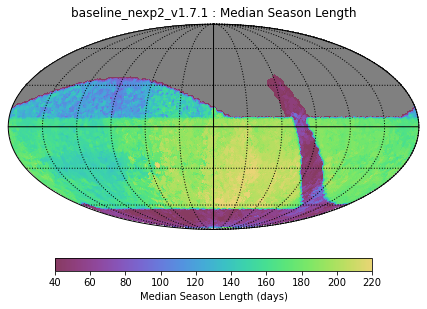

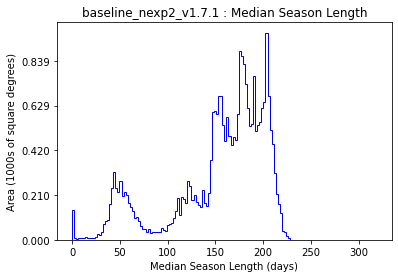

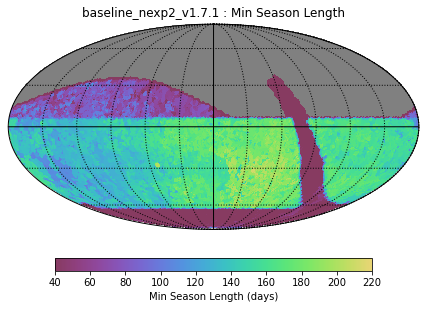

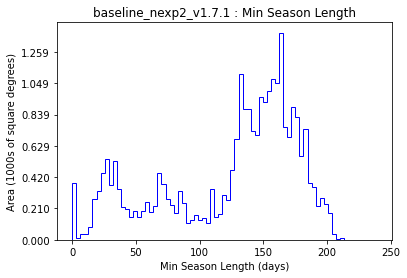

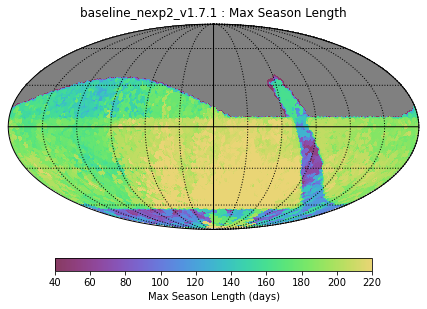

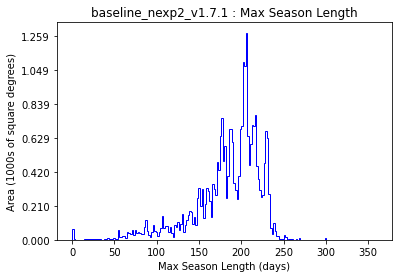

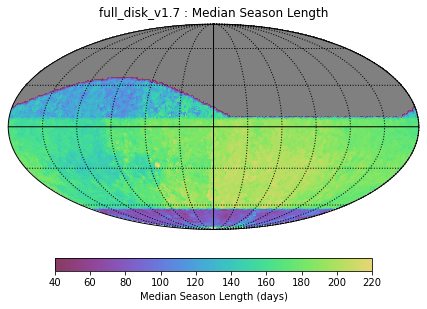

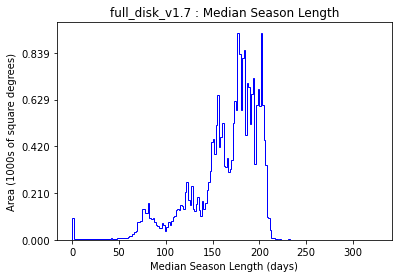

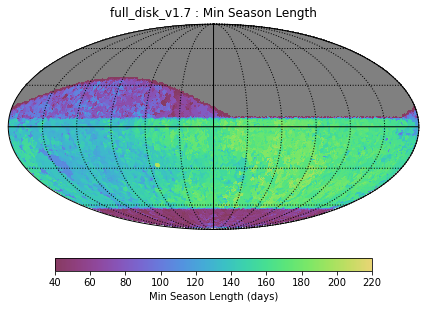

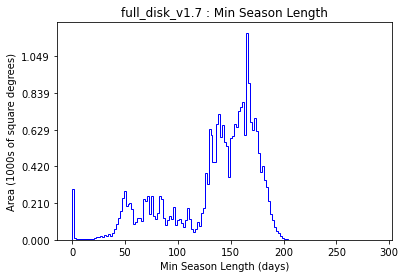

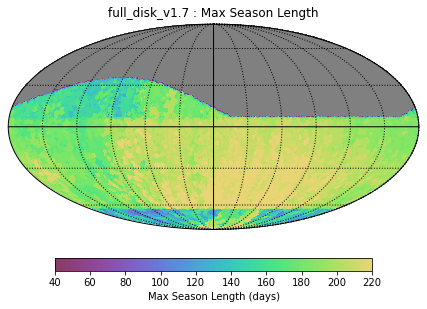

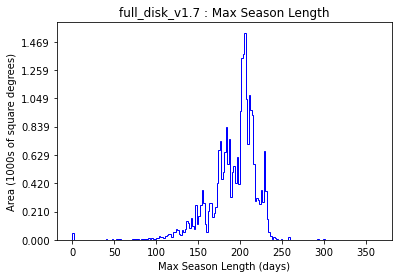

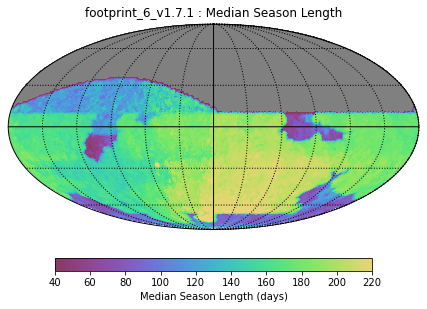

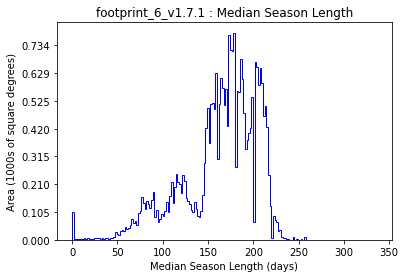

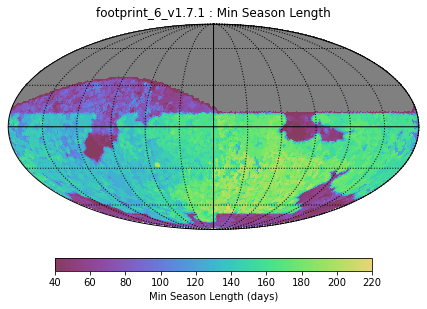

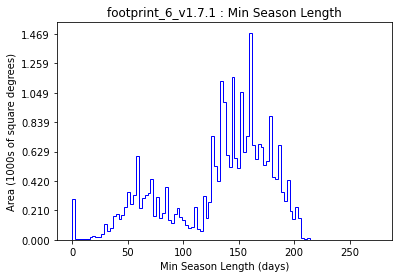

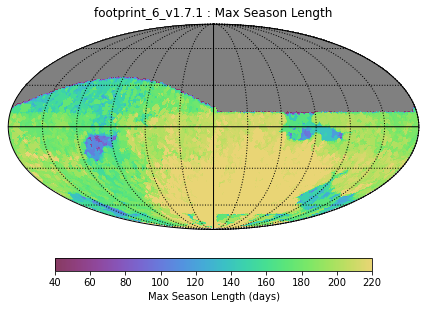

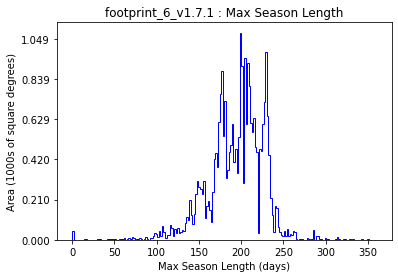

In [5]:
for filename in files:
    opsimdb = db.OpsimDatabase(filename)
    runname = filename.replace('_10yrs.db', '')
    bundleList = []
    
    plotDict = {'colorMin': 40, 'colorMax': 220}

    sql=''
    metric = SeasonLengthMetric(exclude_ends=True, reduceFunc=np.median, metricName='Median Season Length')
    slicer = slicers.HealpixSlicer()
    bundleList.append(metricBundles.MetricBundle(metric, slicer,sql,runName=runname, plotDict=plotDict))
    
    
    metric = SeasonLengthMetric(exclude_ends=True, reduceFunc=np.min, metricName='Min Season Length')
    bundleList.append(metricBundles.MetricBundle(metric, slicer,sql,runName=runname, plotDict=plotDict))
    
    metric = SeasonLengthMetric(exclude_ends=True, reduceFunc=np.max, metricName='Max Season Length')
    bundleList.append(metricBundles.MetricBundle(metric, slicer,sql,runName=runname, plotDict=plotDict))
    
    
    bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bundleDict, opsimdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)